In [283]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score, validation_curve, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



In [284]:
data = pd.read_csv('/home/hasan/Desktop/DATA_SET/Breast_cancer_data.csv')

In [285]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [286]:
data.shape

(569, 6)

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [288]:
data.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [289]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [290]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [291]:
#overview of the dataset based on diagnosis

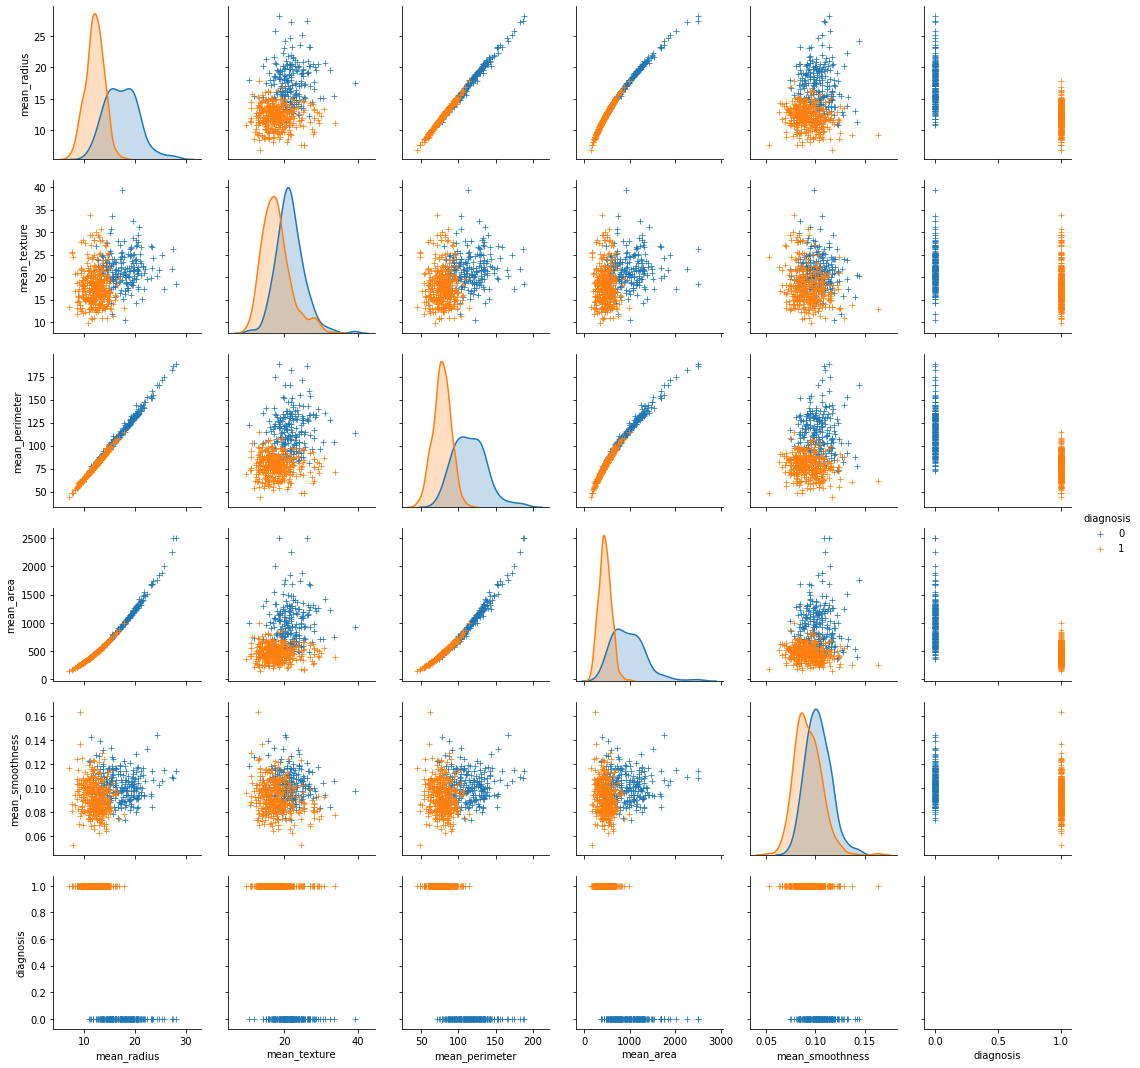

In [292]:
pplot = sns.pairplot(data, hue='diagnosis', markers='+')
plt.show()

# detecting outlier using z-score

In [293]:
z = np.abs(stats.zscore(data))


In [294]:
z

array([[1.09706398, 2.07333501, 1.26993369, 0.9843749 , 1.56846633,
        1.29767572],
       [1.82982061, 0.35363241, 1.68595471, 1.90870825, 0.82696245,
        1.29767572],
       [1.57988811, 0.45618695, 1.56650313, 1.55888363, 0.94221044,
        1.29767572],
       ...,
       [0.70228425, 2.0455738 , 0.67267578, 0.57795264, 0.84048388,
        1.29767572],
       [1.83834103, 2.33645719, 1.98252415, 1.73521799, 1.52576706,
        1.29767572],
       [1.80840125, 1.22179204, 1.81438851, 1.34778924, 3.11208479,
        0.77060855]])

In [295]:
#rows and columns of outliers where threshold > 3
threshold = 3
z_score_greter_than_three = np.where(z>threshold)
print(z_score_greter_than_three)

(array([  3,  82,  82,  82, 105, 122, 122, 122, 180, 180, 180, 212, 212,
       212, 219, 232, 239, 259, 339, 352, 352, 352, 461, 461, 461, 504,
       521, 521, 568]), array([4, 0, 2, 3, 4, 2, 3, 4, 0, 2, 3, 0, 2, 3, 1, 1, 1, 1, 3, 0, 2, 3,
       0, 2, 3, 4, 2, 3, 4]))


In [296]:
print(z[3][4])

3.2835534802794246


In [297]:
#removing outliers

In [298]:
data = data[(z<3).all(axis=1)]

In [299]:
data.shape

(553, 6)

In [300]:
#outlier of 'mean_area' column

In [301]:
data['mean_area'].describe()

count     553.000000
mean      635.666546
std       308.923735
min       143.500000
25%       420.300000
50%       546.100000
75%       761.300000
max      1686.000000
Name: mean_area, dtype: float64

In [302]:
data = data[data['mean_area'] <=1000]

# The dataset after cleaning and removing outlier 

In [303]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
5,12.45,15.70,82.57,477.1,0.12780,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0
10,16.02,23.24,102.70,797.8,0.08206,0


In [304]:
data.shape

(470, 6)

# Dividing dataset for Machine Learning Algorithm

In [305]:
#dividing datset for feature data and lavel data
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [306]:
#dividing dataset for training and testing
Xtrain,xtest, Ytrain,ytest = train_test_split(X,y, test_size=.3, random_state=0)

# Applying Machine Learning Algorithm

Text(0, 0.5, 'accuracy score')

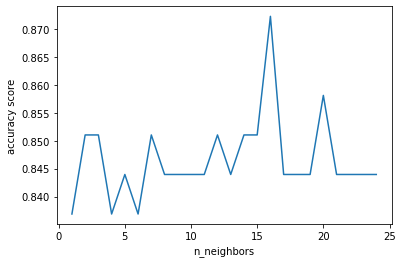

In [307]:
#applying KNeighborsClassifier
#finding best number for n_neighbors parameter
n_neighbors = list(range(1,25))
scores = []

for i in n_neighbors:
    algo = KNeighborsClassifier(n_neighbors=i)
    algo.fit(Xtrain,Ytrain)
    scores.append(algo.score(xtest,ytest))
    
plt.plot(n_neighbors, scores)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy score')

In [308]:
#applying RandomForestClassifier

In [309]:
rfc = RandomForestClassifier(n_estimators=100, max_leaf_nodes=350)
rfc.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=350,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [310]:
rfc.score(xtest,ytest)

0.9219858156028369

# score using cross_val_score

In [311]:
cvs = cross_val_score(rfc,X,y, cv=5)
cvs

array([0.92631579, 0.87234043, 0.92553191, 0.93617021, 0.89247312])

In [312]:
cvs.mean()

0.9105662921889486

# drowing Validation curve and Learning curve

In [313]:
#validation_curve

In [314]:
pr = np.array([10,15,20,25,50,75,100])
train_scores, test_scores = validation_curve(rfc, X,y, cv=5, param_name='n_estimators', 
                                             param_range=pr, scoring='accuracy', n_jobs=1, 
                                             error_score='raise' )

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

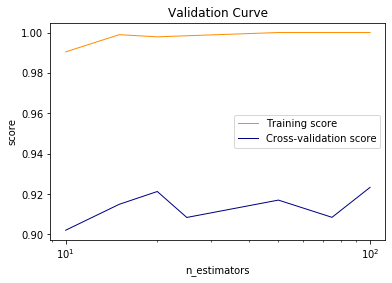

In [315]:
plt.semilogx(pr, train_mean, label="Training score", color="darkorange", lw=1)
plt.semilogx(pr, test_mean, label="Cross-validation score", color="navy", lw=1)


#plt.fill_between(pr, train_mean - train_std, train_mean + train_std, alpha=0.2, color="darkorange", lw=1)
#plt.fill_between(pr, test_mean - test_std, test_mean + test_std, alpha=0.2, color="navy", lw=1)


plt.xlabel('n_estimators')
plt.ylabel('score')
plt.title('Validation Curve')
plt.legend(loc='best')


In [316]:
#Learning_curve

In [317]:
train_sizes, train_scores, test_scores = learning_curve(rfc, X,y, cv=5, scoring='accuracy', 
                                                        n_jobs=1, train_sizes = np.linspace(.1,1,50), 
                                                        verbose=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

[learning_curve] Training set sizes: [ 37  44  51  58  65  71  78  85  92  99 106 113 120 127 133 140 147 154
 161 168 175 182 189 195 202 209 216 223 230 237 244 251 257 264 271 278
 285 292 299 306 313 319 326 333 340 347 354 361 368 375]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   43.7s finished


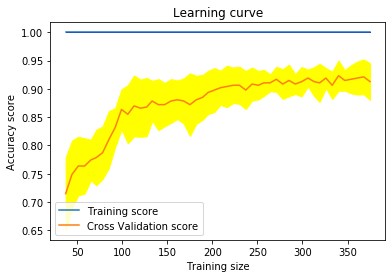

In [318]:
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross Validation score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color = 'blue')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color = 'yellow')

plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.title('Learning curve')
plt.legend(loc='best')